In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
%matplotlib inline

/Users/marysia/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data_path = Path('data')
train_path = data_path / 'train'
test_path = data_path / 'test'

IMG_HEIGHT = 30
IMG_WIDTH = 30

# Number of Classes
NUM_CATEGORIES = 43

In [3]:
def load_data(data_dir):
    '''
    Loading data from Train folder.
    
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        category_dir = data_dir / str(category)
        for img_file in category_dir.glob('*'): 
            img = load_img(img_file, target_size = (30, 30))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(category)
            
    return images, labels

In [4]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and validation set
x_train, x_val, y_train, y_val = train_test_split(np.array(images), labels, test_size=0.4)

# Traffic Sign Dataset

Goal: classify images that contain different traffic signs

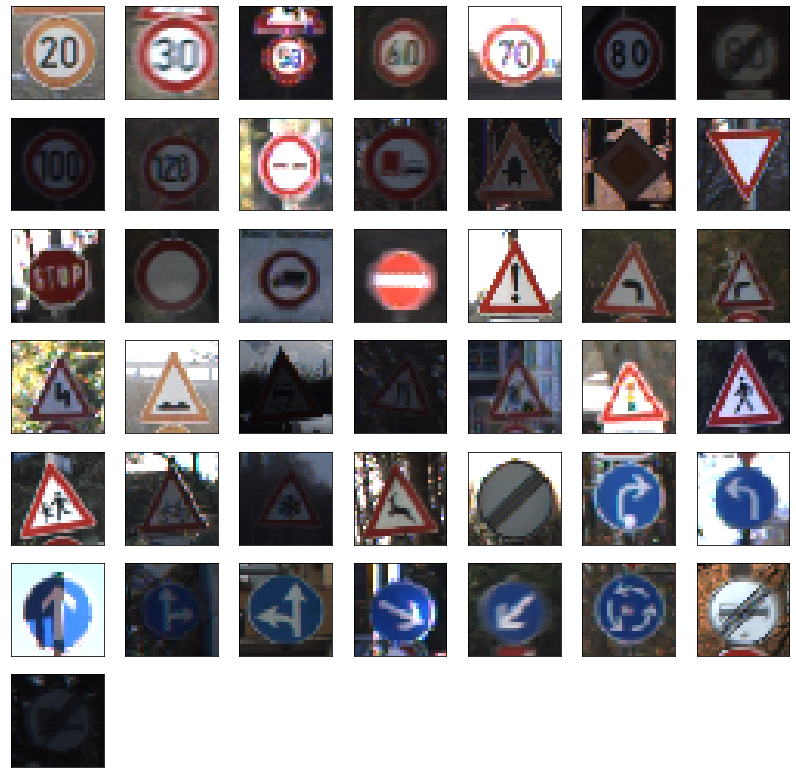

In [5]:
# Visualizing all the different traffic signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

In [7]:
# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
____________________________________________________

In [9]:
# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [10]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [11]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fitting the model
EPOCHS = 10
model.fit(x_train, 
          y_train,
          validation_data = (x_val, y_val), 
          epochs=EPOCHS, 
          steps_per_epoch=60
        )

Epoch 1/10
60/60 [==============================] - 8s 128ms/step - loss: 6.3455 - accuracy: 0.0418 - val_loss: 3.5990 - val_accuracy: 0.0959
Epoch 2/10
60/60 [==============================] - 7s 120ms/step - loss: 3.4585 - accuracy: 0.1106 - val_loss: 3.1579 - val_accuracy: 0.2123
Epoch 3/10
60/60 [==============================] - 7s 121ms/step - loss: 2.8014 - accuracy: 0.2607 - val_loss: 2.2074 - val_accuracy: 0.4497
Epoch 4/10
60/60 [==============================] - 7s 117ms/step - loss: 1.9603 - accuracy: 0.4550 - val_loss: 1.4538 - val_accuracy: 0.5928
Epoch 5/10
60/60 [==============================] - 7s 122ms/step - loss: 1.3617 - accuracy: 0.5997 - val_loss: 0.9829 - val_accuracy: 0.7199
Epoch 6/10
60/60 [==============================] - 8s 127ms/step - loss: 1.0006 - accuracy: 0.7001 - val_loss: 0.6606 - val_accuracy: 0.8312
Epoch 7/10
60/60 [==============================] - 8s 128ms/step - loss: 0.7503 - accuracy: 0.7769 - val_loss: 0.4956 - val_accuracy: 0.8590
Epoch 

In [12]:
loss, accuracy = model.evaluate(x_val, y_val)

print('Validation set accuracy: ', accuracy * 100)

491/491 [==============================] - 2s 5ms/step - loss: 0.2959 - accuracy: 0.9200
Validation set accuracy:  92.00459122657776
